In [1]:
from __future__ import print_function

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

#import the rxn role assignment functionality from the rdkit contrib directory
import sys
from rdkit.Chem import RDConfig
sys.path.append(RDConfig.RDContribDir)

from RxnRoleAssignment import identifyReactants
import utilsEvaluation

In [2]:
%matplotlib inline

In [3]:
def showDetailedExamples(data, idx):
    data = data.iloc[idx]
    rxn = AllChem.ReactionFromSmarts(str(data['rxn_Smiles']),useSmiles=True)
    res = identifyReactants.identifyReactants(rxn)
    print("Patent ID: ",data['patentID'])
    print("Reactants identified by FP-based method:",res[0])
    print("Expert-mapped reaction")
    display(rxn)

#### Load the data

In [4]:
rxnCls = pickle.load(file('data/rxnClasses.pickle'))

In [5]:
dataSetA = pd.read_csv('data/dataSetA.csv')

In [6]:
dataSetA.head()

,rxn_Class,patentID,rxn_Smiles,reactantSet
0,1,US07678803B2,[H-].[CH3:1][c:2]1[cH:3][nH:4][c:5]2[c:6]1[C:7...,"set([1, 3])"
1,10,US07071180B2,CC(=O)O.[cH:5]1[cH:4][n:3][c:2]([c:7]([n:6]1)[...,"set([1, 6])"
2,1,US20130079342A1,CC(C)(C)[O-].CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CC...,"set([5, 13])"
3,2,US20140171403A1,[cH:25]1[c:24]([cH:31][c:29]([cH:28][c:26]1[Cl...,"set([0, 1])"
4,9,US07285563B2,CCCC[N+](CCCC)(CCCC)CCCC.CN(C)C=O.[cH:5]1[cH:6...,"set([2, 5])"


In [7]:
dataSetA.shape

(683, 4)

In [8]:
dataSetA['reactantSet'] = [eval(x) for x in dataSetA['reactantSet']]

#### Evalution on data set A

In [9]:
numDifferences, timings, numSol = utilsEvaluation.calcNumDifferences(dataSetA, 1, 3, 4)

In [10]:
times=np.array(timings)
print(times.mean(), np.median(times), times.min(), times.max(), len(times))

0.0302975268525 0.00969505310059 0.00459694862366 8.18769621849 683


[0.0, 98.5358711566618, 1.4641288433382138, 0.0, 0.0]


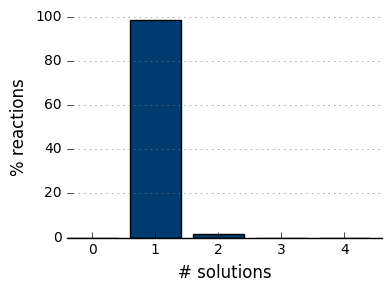

In [11]:
fig = utilsEvaluation.plotNumberSolutions(numSol)
# fig.savefig("dataSetA_numSolutions.png", dpi=300, format='png', bbox_inches='tight')

[0.8843338213762811, 0.027818448023426062, 0.0746705710102489, 0.010248901903367497, 0.0014641288433382138]


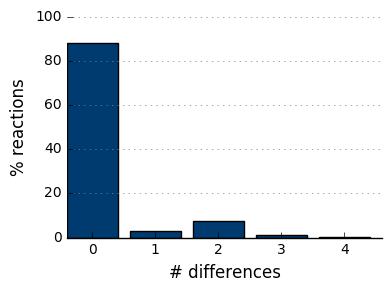

In [12]:
fig = utilsEvaluation.plotNumberDifferences(numDifferences)
# fig.savefig("dataSetA_overall.png", dpi=300, format='png', bbox_inches='tight')

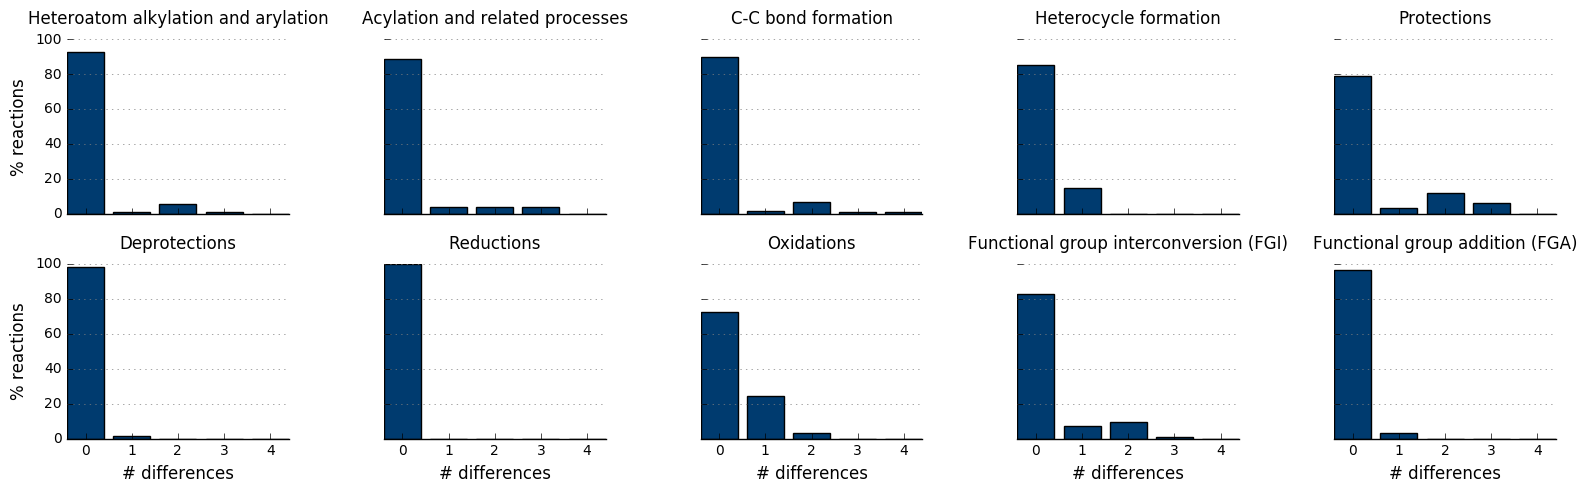

In [13]:
fig = utilsEvaluation.plotNumberDifferencesRxnCls(numDifferences,rxnCls)
# fig.savefig("dataSetA_rxnclasses.png", dpi=300, format='png', bbox_inches='tight')

#### Some detailed results

Patent ID:  US08658636B2
Reactants identified by FP-based method: [set([0, 4])]
Expert-mapped reaction


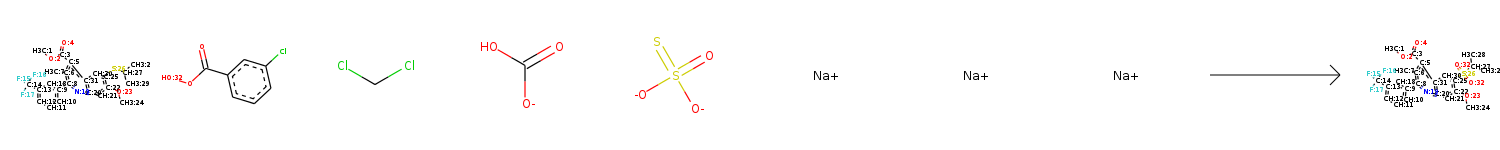

In [14]:
showDetailedExamples(dataSetA,603)

Patent ID:  US05411982
Reactants identified by FP-based method: [set([0, 4])]
Expert-mapped reaction


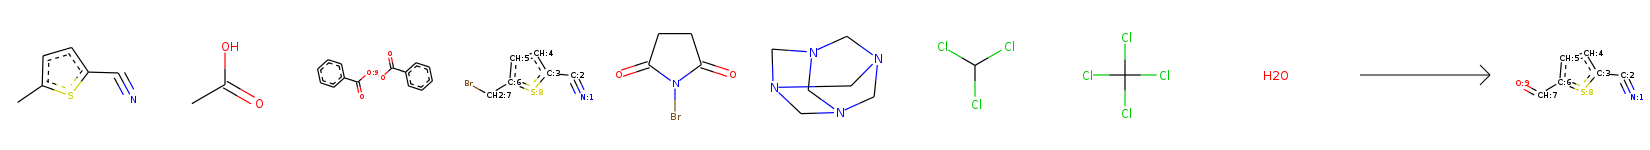

In [15]:
showDetailedExamples(dataSetA,84)

Patent ID:  US20100152458A1
Reactants identified by FP-based method: [set([1, 3]), set([1, 4])]
Expert-mapped reaction


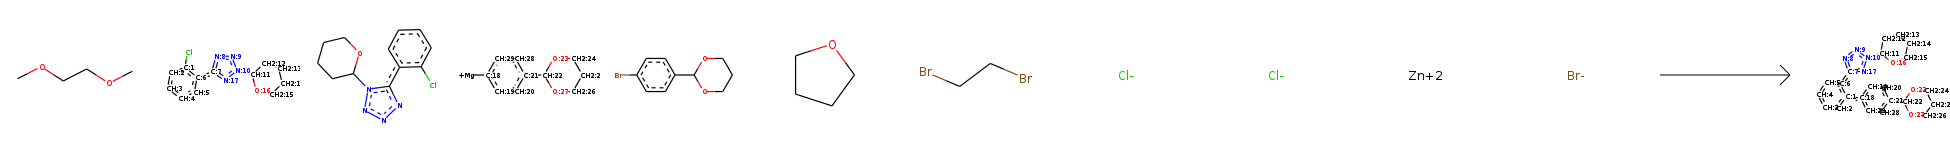

In [16]:
showDetailedExamples(dataSetA,580)

Patent ID:  US08822472B2
Reactants identified by FP-based method: [set([0, 2])]
Expert-mapped reaction


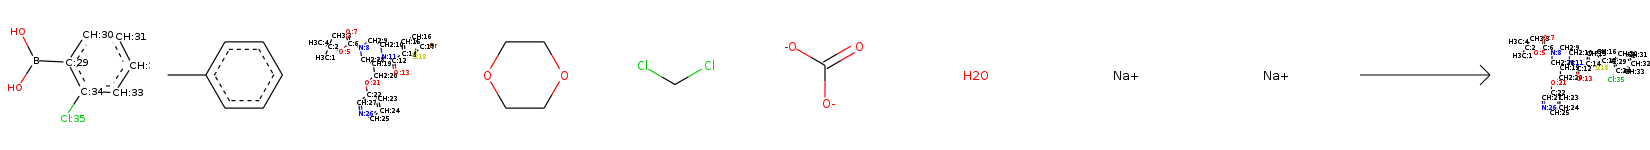

In [17]:
showDetailedExamples(dataSetA,36)

Patent ID:  US20150018363A1
Reactants identified by FP-based method: [set([0, 2])]
Expert-mapped reaction


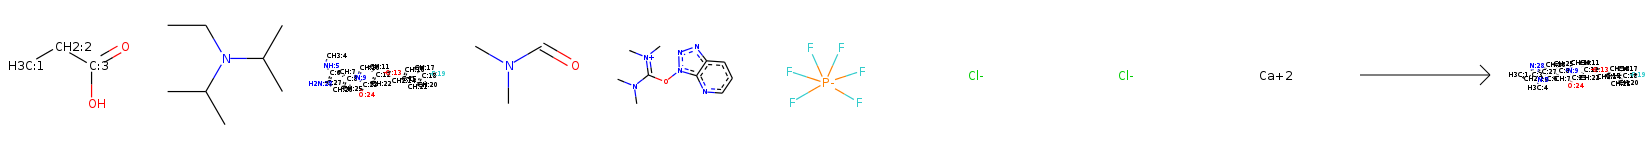

In [18]:
showDetailedExamples(dataSetA,264)

Patent ID:  US06156783
Reactants identified by FP-based method: [set([1, 4])]
Expert-mapped reaction


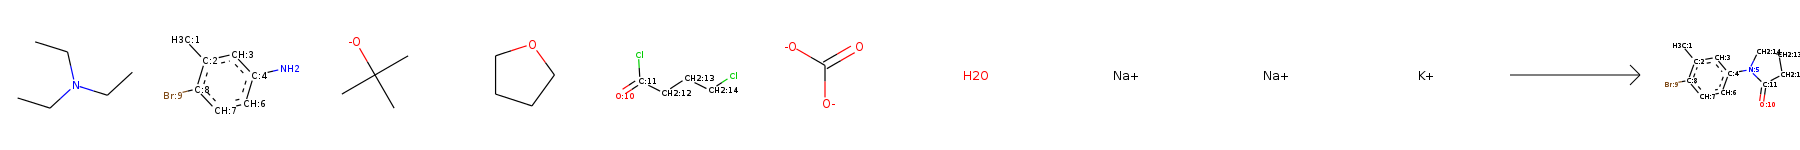

In [19]:
showDetailedExamples(dataSetA,621)